# COVID-19 Genome Analysis using Biopython
### Fetch COVID-19 Genome from NCBI
**MN908947** - covid-19 genome used here was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019

In [ ]:
from Bio import Entrez, SeqIO
Entrez.email = "dummy@email.com" 
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [2]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [3]:
covid_dna=recs[0].seq

In [4]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [ ]:
print(f"Length of the genome: {len(covid_dna)}") #number of nucleotides

Length of the genome: 29903


In [6]:
#molecular weight of the genome
from Bio.SeqUtils import molecular_weight
print(f"Molecular weight of the genome: {molecular_weight(covid_dna)} g/mol")

Molecular weight of the genome: 9241219.214399999 g/mol


In [7]:
# gc content
from Bio.SeqUtils import gc_fraction
print(f"GC content of the genome: {gc_fraction(covid_dna)*100:.2f}%")

GC content of the genome: 37.97%


### Distribution of nucleotides in COVID-19 genome

In [8]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'G': covid_dna.count('G'),
    'C': covid_dna.count('C')
}

In [9]:
count_nucleotides

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}

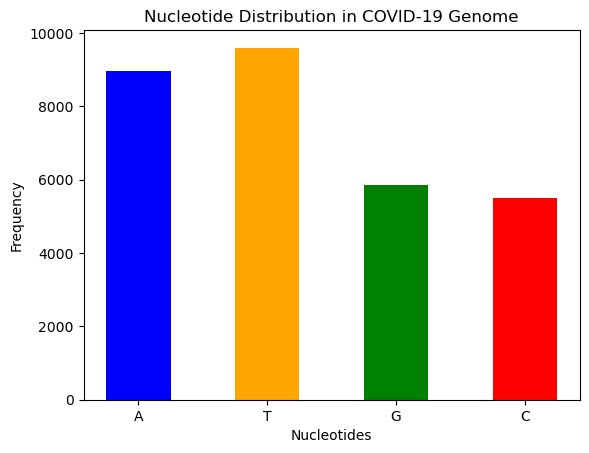

In [10]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Nucleotides')
plt.ylabel('Frequency')
plt.title('Nucleotide Distribution in COVID-19 Genome')
plt.show()

## Transcription

In [11]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

## Translation

In [12]:
covid_translated = covid_mrna.translate()
covid_translated

c:\Users\SUMANT\anaconda3\Lib\site-packages\Bio\Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [13]:
# common amino acids
from collections import Counter
common_amino = Counter(covid_translated)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

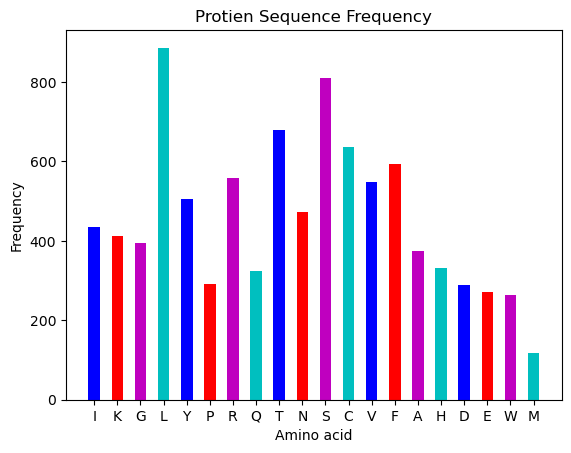

In [14]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b','r','m','c'])
plt.xlabel('Amino acid')
plt.ylabel('Frequency')
plt.title('Protien Sequence Frequency')
plt.show()

In [15]:
print(f"Covid-19's genome has {sum(common_amino.values())} amino acids")

Covid-19's genome has 9193 amino acids


In [16]:
protiens=covid_translated.split('*')

In [17]:
protiens[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [18]:
print(f'We have {len(protiens)} amino acids in covid-19 genome')

We have 775 amino acids in covid-19 genome


In [33]:
for protien in protiens:
    if len(protien) < 20:
        protiens.remove(protien) 

In [34]:
print(f'We have {len(protiens)} protiens with more than 20 amino in the covid-19 genome')

We have 80 protiens with more than 20 amino in the covid-19 genome


In [35]:
top_5_protiens = sorted(protiens, key = len)

In [36]:
top_5_protiens[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [37]:
len(top_5_protiens[-1])

2701

In [41]:
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_protiens[-1]}")